In [1]:
from utils import FishEyeImage, rot
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from scipy.optimize import minimize, curve_fit
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, angular_separation, position_angle, offset_by, ICRS
from PIL import Image
from photutils.aperture import CircularAperture


In [2]:
file = 'img-s'

zhangbei = EarthLocation(lon=115*u.deg+14*u.arcsec,lat=41*u.deg+13*u.arcmin+53*u.arcsec,height = 1466)
dunhuang  = EarthLocation(lon=94.322799*u.deg,lat=40.359581*u.deg,height = 1100)
pic = FishEyeImage(file+'.CR3',loc = zhangbei)

solution = pic.solve(solve_size=800)

{'ra': 2.305960498122239, 'dec': -0.4076435997612543, 'eq_roll': 6.122526523662375}


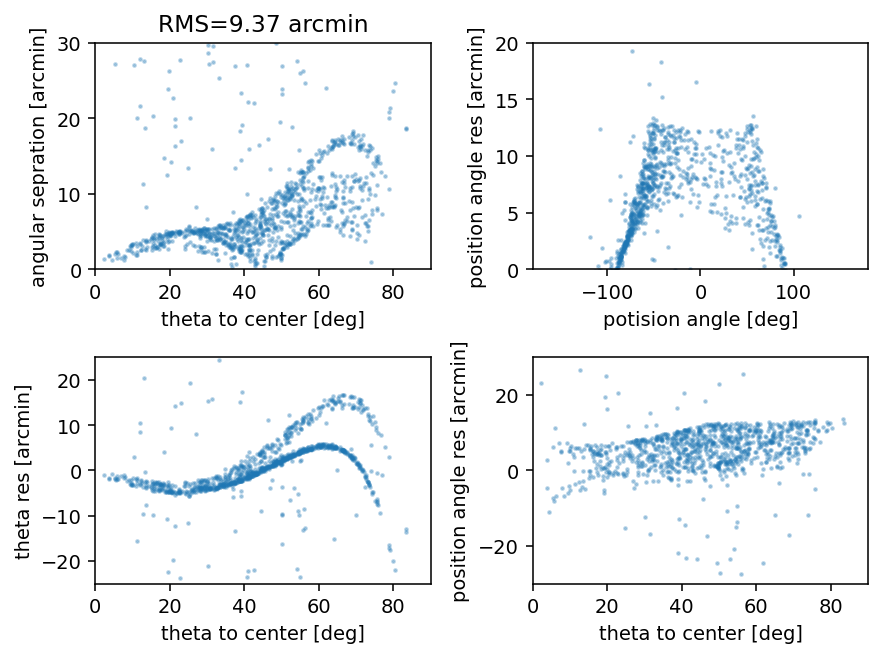

In [3]:
rms = pic.initial_xmatch()
pic.draw_residual(alpha=0.3,dpi=140,s=2)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 7.334063072507628
        x: [ 3.319e+00  4.313e-01  6.267e+00  3.000e+03  2.000e+03
             1.461e+01 -1.793e-01]
      nit: 22
      jac: [-8.701e-03 -2.050e-02 -1.874e-03  2.903e-02  1.140e-02
             2.858e-02  1.981e-03]
     nfev: 208
     njev: 26
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>


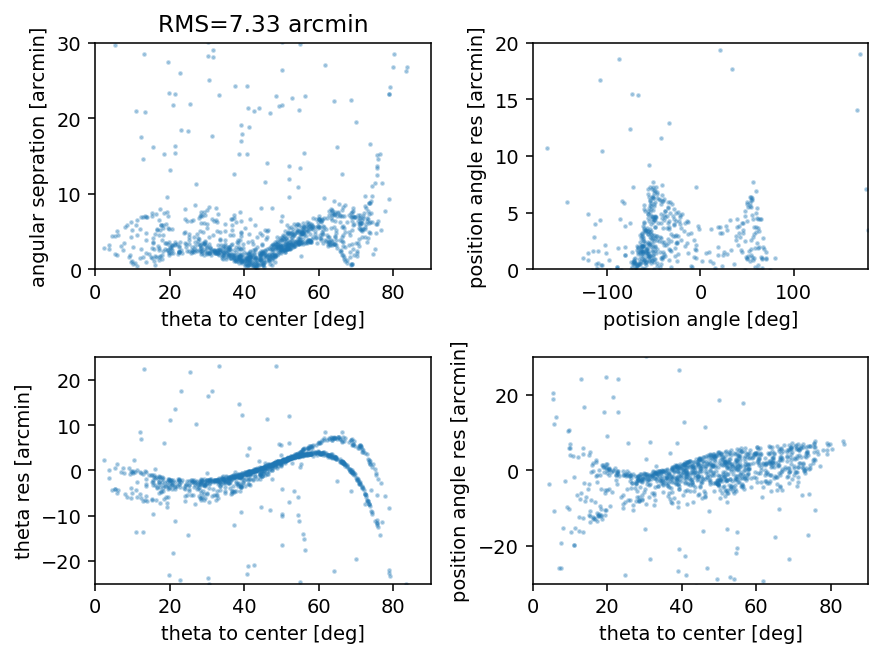

In [4]:
result  = pic.optimize()
print(result)
pic.draw_residual(alpha=0.3,dpi=140,s=2)

(-0.0072219564565407035, 0.017219641211707177, -0.010192116120080565, 0.0012940061704298834)


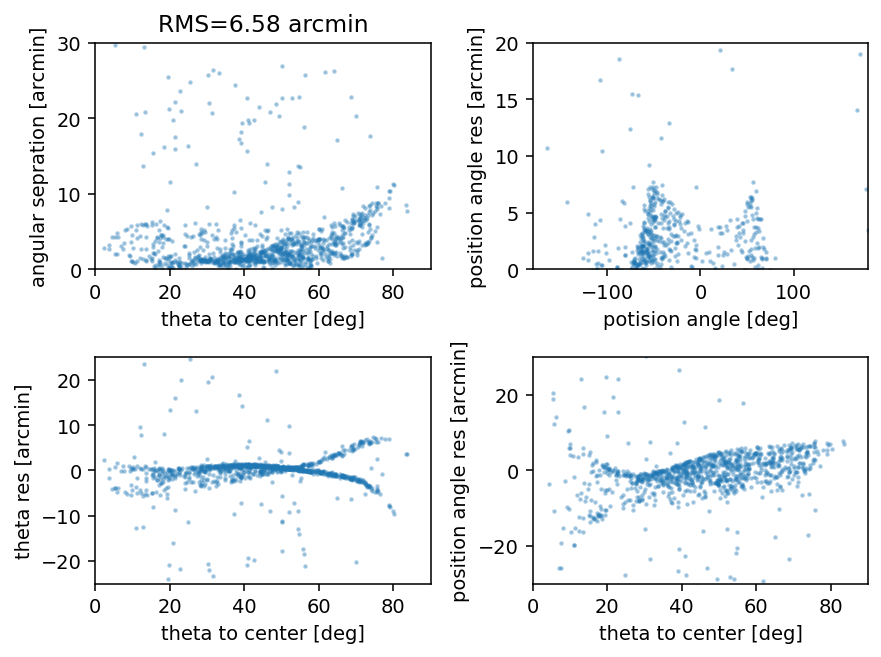

In [5]:
result  = pic.distort_optimize()
print(result)
pic.draw_residual(alpha=0.3,dpi=140,s=2)

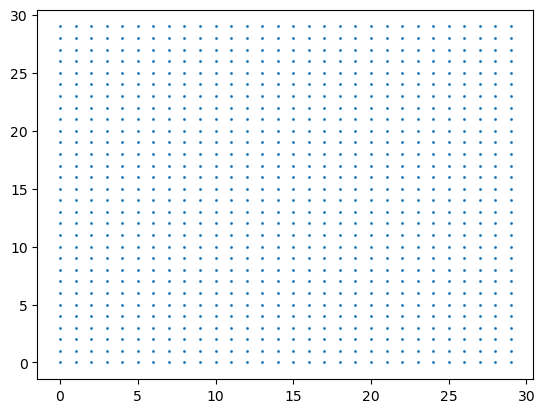

In [6]:
g = np.mgrid[0:30, 0:30]
import matplotlib.pyplot as plt
plt.scatter(g[0].flatten(),g[1].flatten(), s=1)

In [7]:
resolution=20
[sample_y,sample_x]=np.mgrid[0:4000//resolution,0:6000//resolution]*resolution+(resolution/2-0.5)
pic.uv2xy(sample_x.flatten(),sample_y.flatten())

(array([ 1942.01412789,  1942.33663295,  1942.659138  , ...,
        -1941.68439084, -1941.36188579, -1941.03938074]),
 array([ 3022.19691623,  3002.19951664,  2982.20211704, ...,
        -2981.20926823, -3001.20666782, -3021.20406741]))

In [9]:
im_u = pic.stars_uv[0]
im_v = pic.stars_uv[1]
file = 'img-s'
img =  Image.open(file+'.jpg')
%matplotlib qt
plt.imshow(img)

star = CircularAperture(np.transpose([im_u,im_v]), r=5)
_ = star.plot(color='red', lw=1.5)